In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\delivery_time.csv',encoding='latin1')
df



,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.rename(columns={'Delivery Time':'Delivery','Sorting Time':'Sorting'},inplace=True)


In [4]:
df.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


<Axes: >

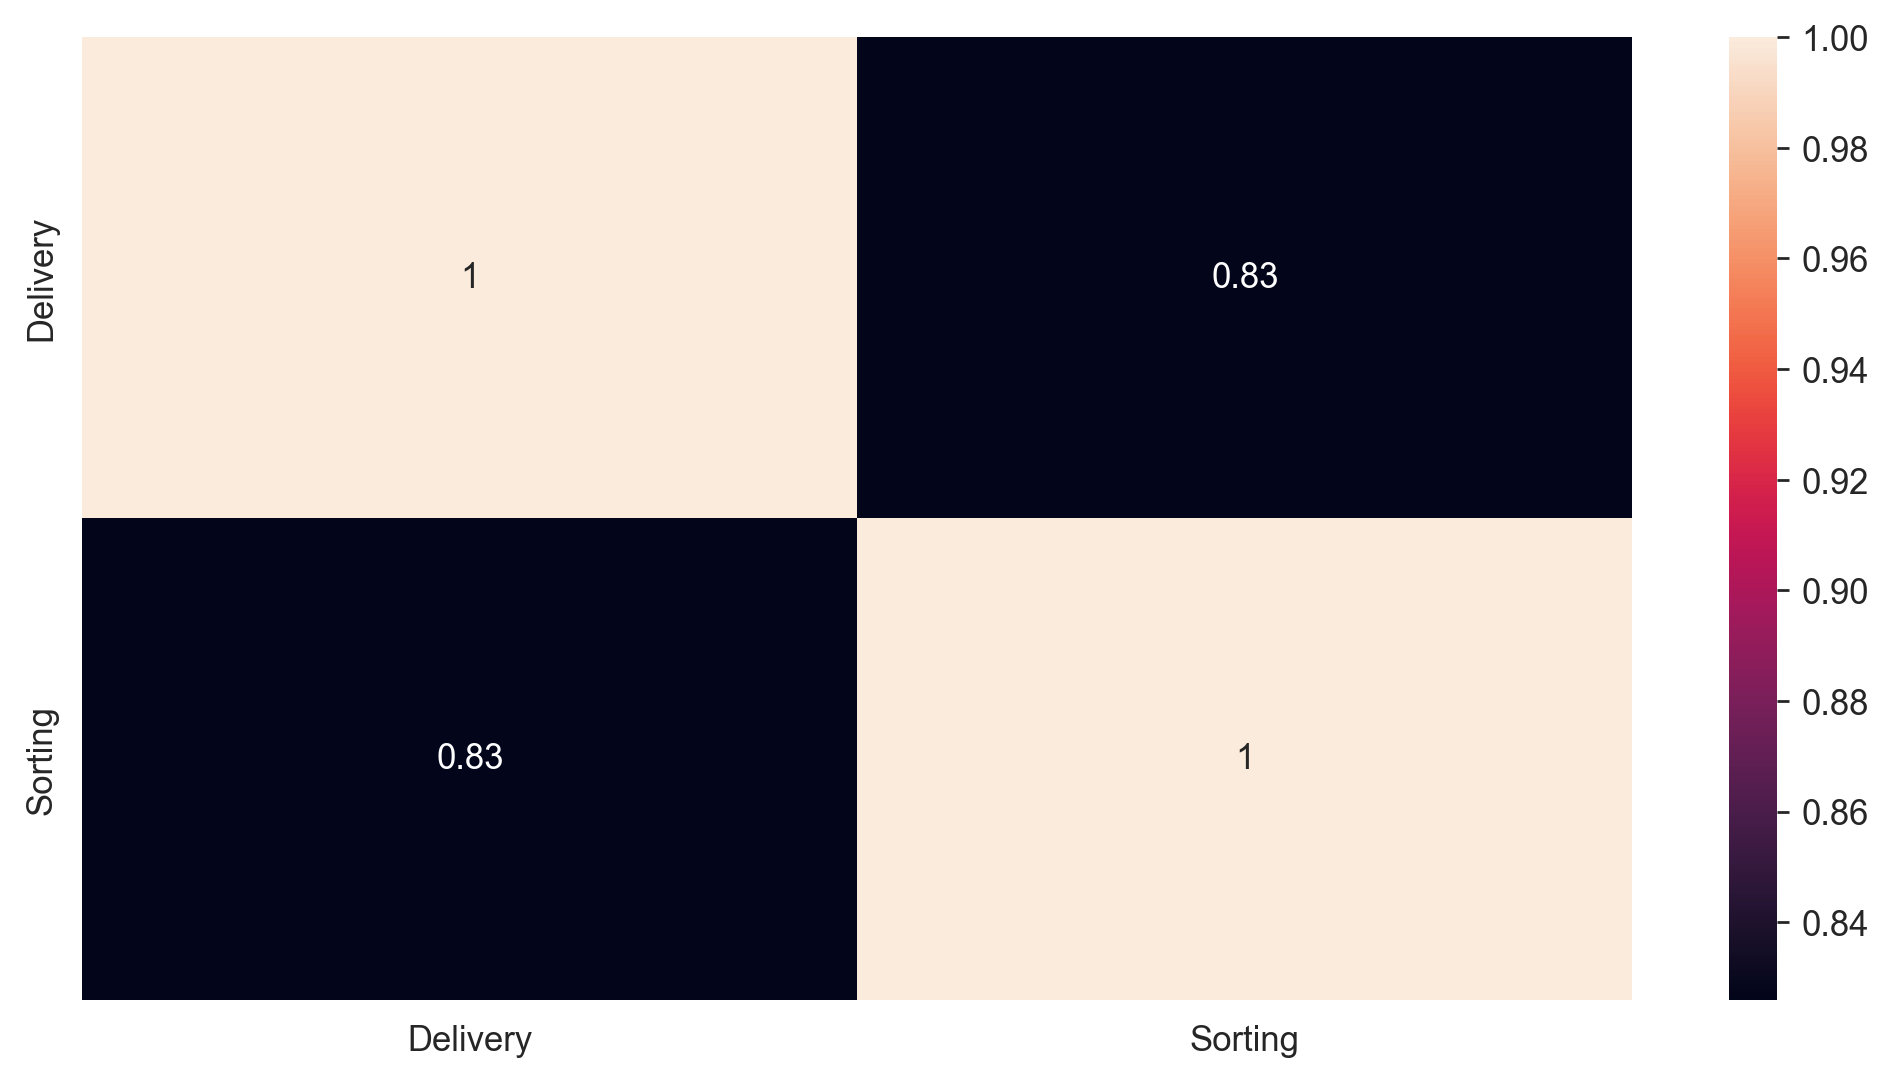

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
import statsmodels.formula.api as smf

In [8]:
model=smf.ols('Delivery~Sorting',data=df).fit()
model

In [9]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [10]:
Sorting=8

y=1.649020*Sorting+6.582734
y

19.774894

In [11]:
model.pvalues

Intercept    0.001147
Sorting      0.000004
dtype: float64

In [12]:
model.rsquared

0.6822714748417231

In [13]:
newdf=pd.DataFrame({'Sorting' :[2,3,4,5,6]})
newdf

,Sorting
0,2
1,3
2,4
3,5
4,6


In [14]:
model.predict(newdf)

0     9.880774
1    11.529794
2    13.178814
3    14.827833
4    16.476853
dtype: float64

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\4215461446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting'])
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\4215461446.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery'])


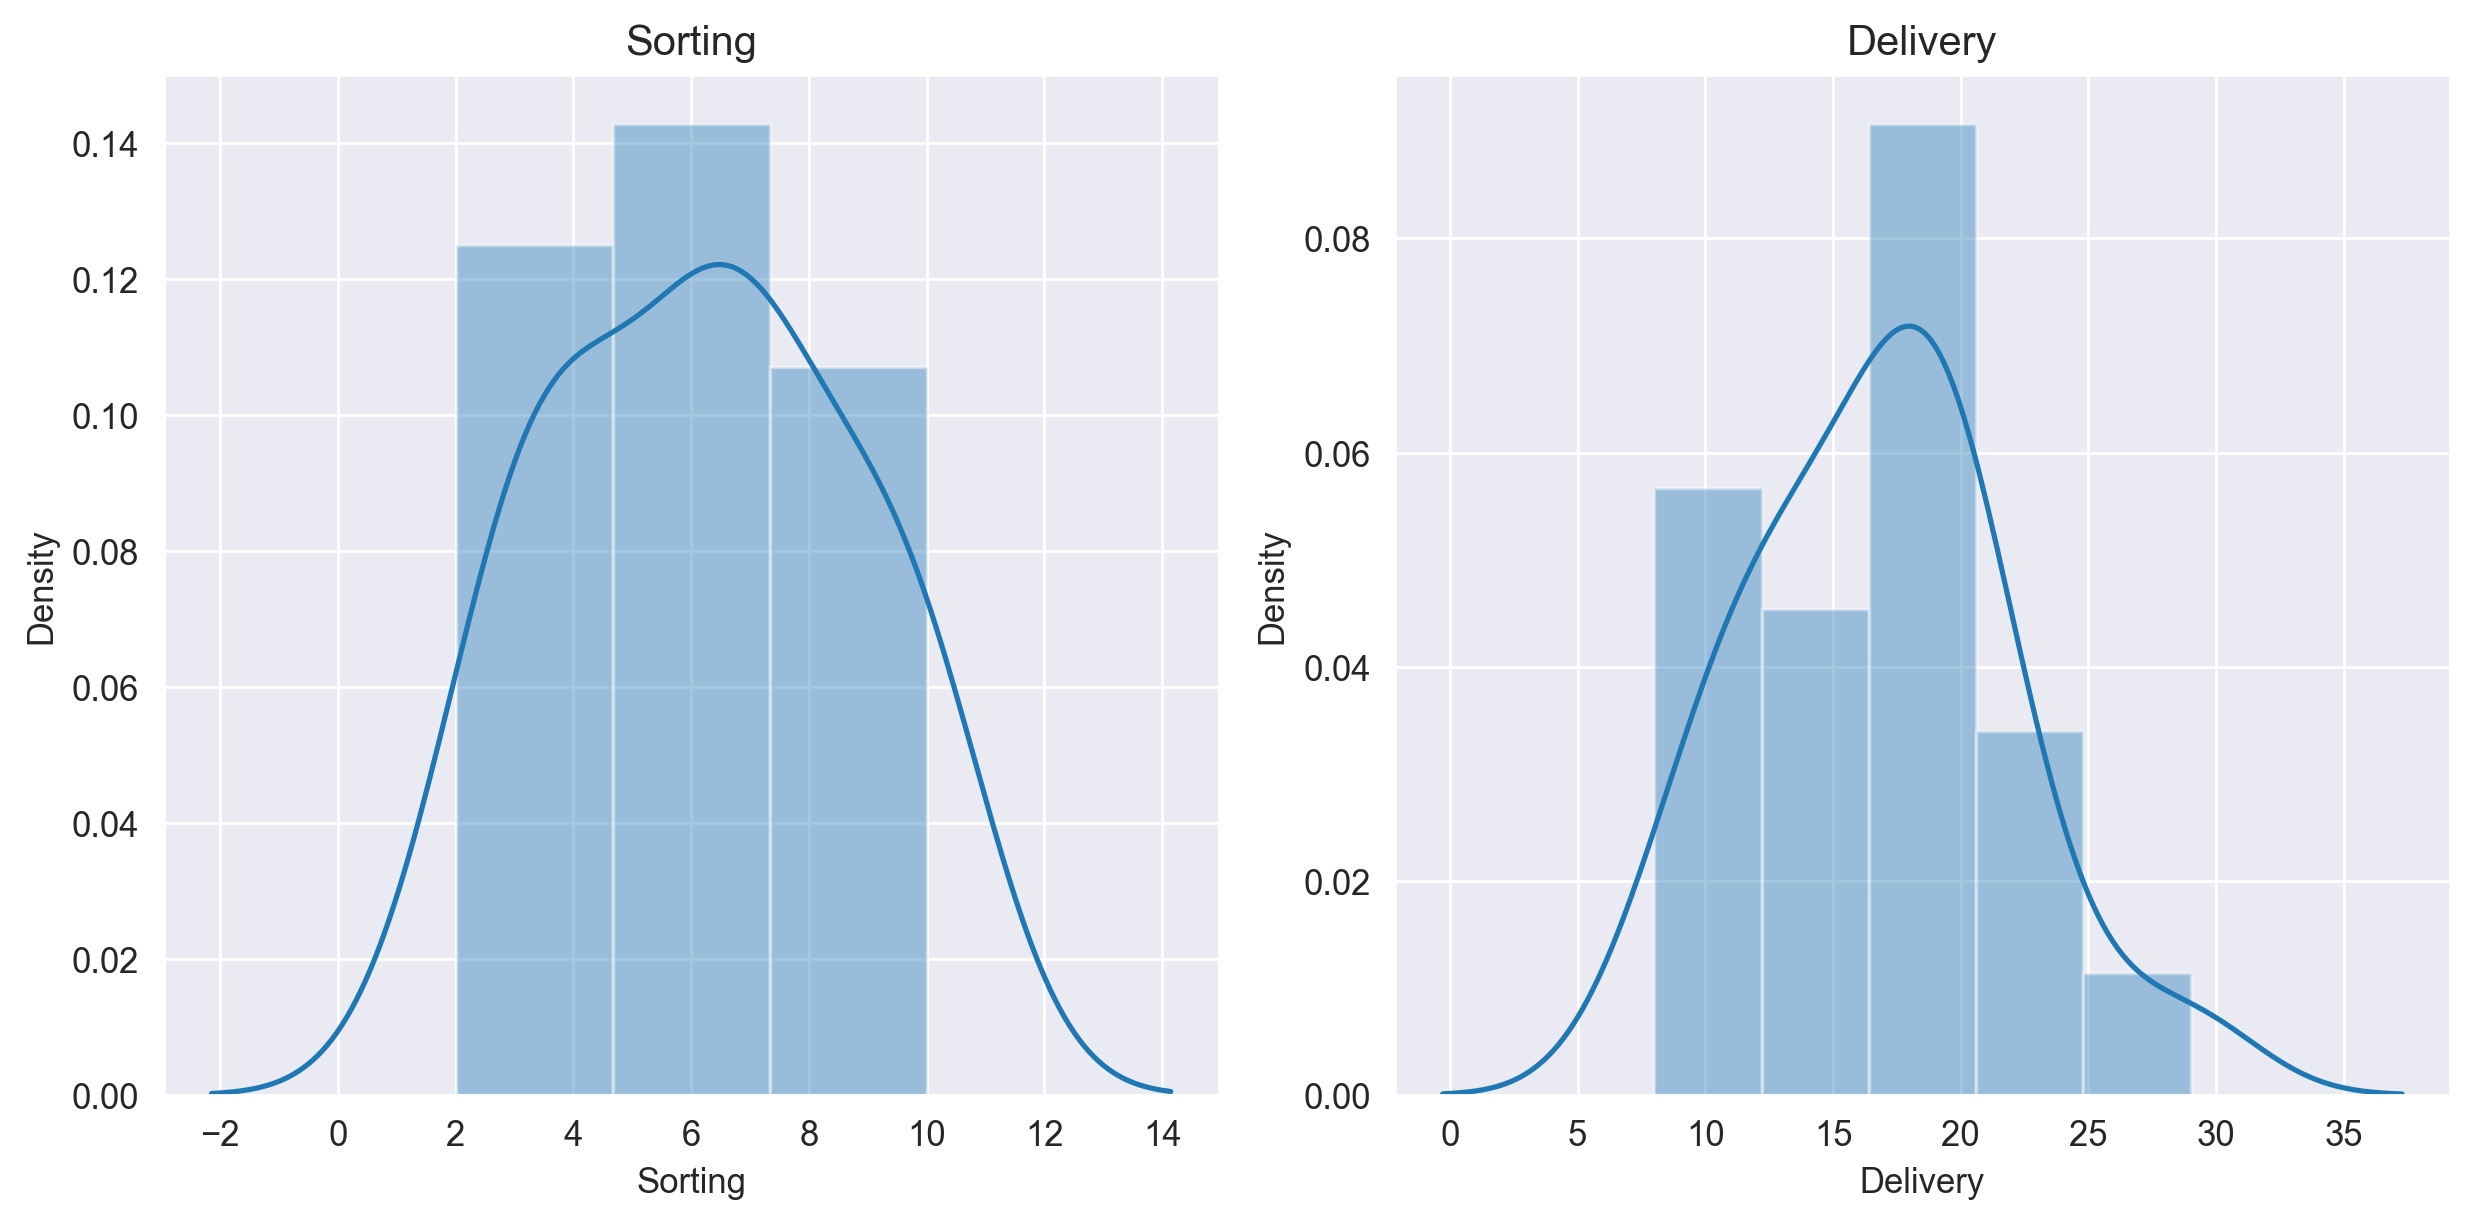

In [15]:
plt.subplot(1,2,1)
sns.distplot(df['Sorting'])
plt.title('Sorting')

plt.subplot(1,2,2)
sns.distplot(df['Delivery'])
plt.title('Delivery')
plt.tight_layout()

In [16]:
df['Delivery'].skew()

0.3523900822831107

In [17]:
df['Sorting'].skew()

0.047115474210530174

In [18]:
# Log Transformation

In [20]:
df['log_sorting'] = np.log(df['Sorting'])
df['log_delivery'] = np.log(df['Delivery'])
df

,Delivery,Sorting,log_sorting,log_delivery
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\4075295837.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_sorting'])
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\4075295837.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_delivery'])


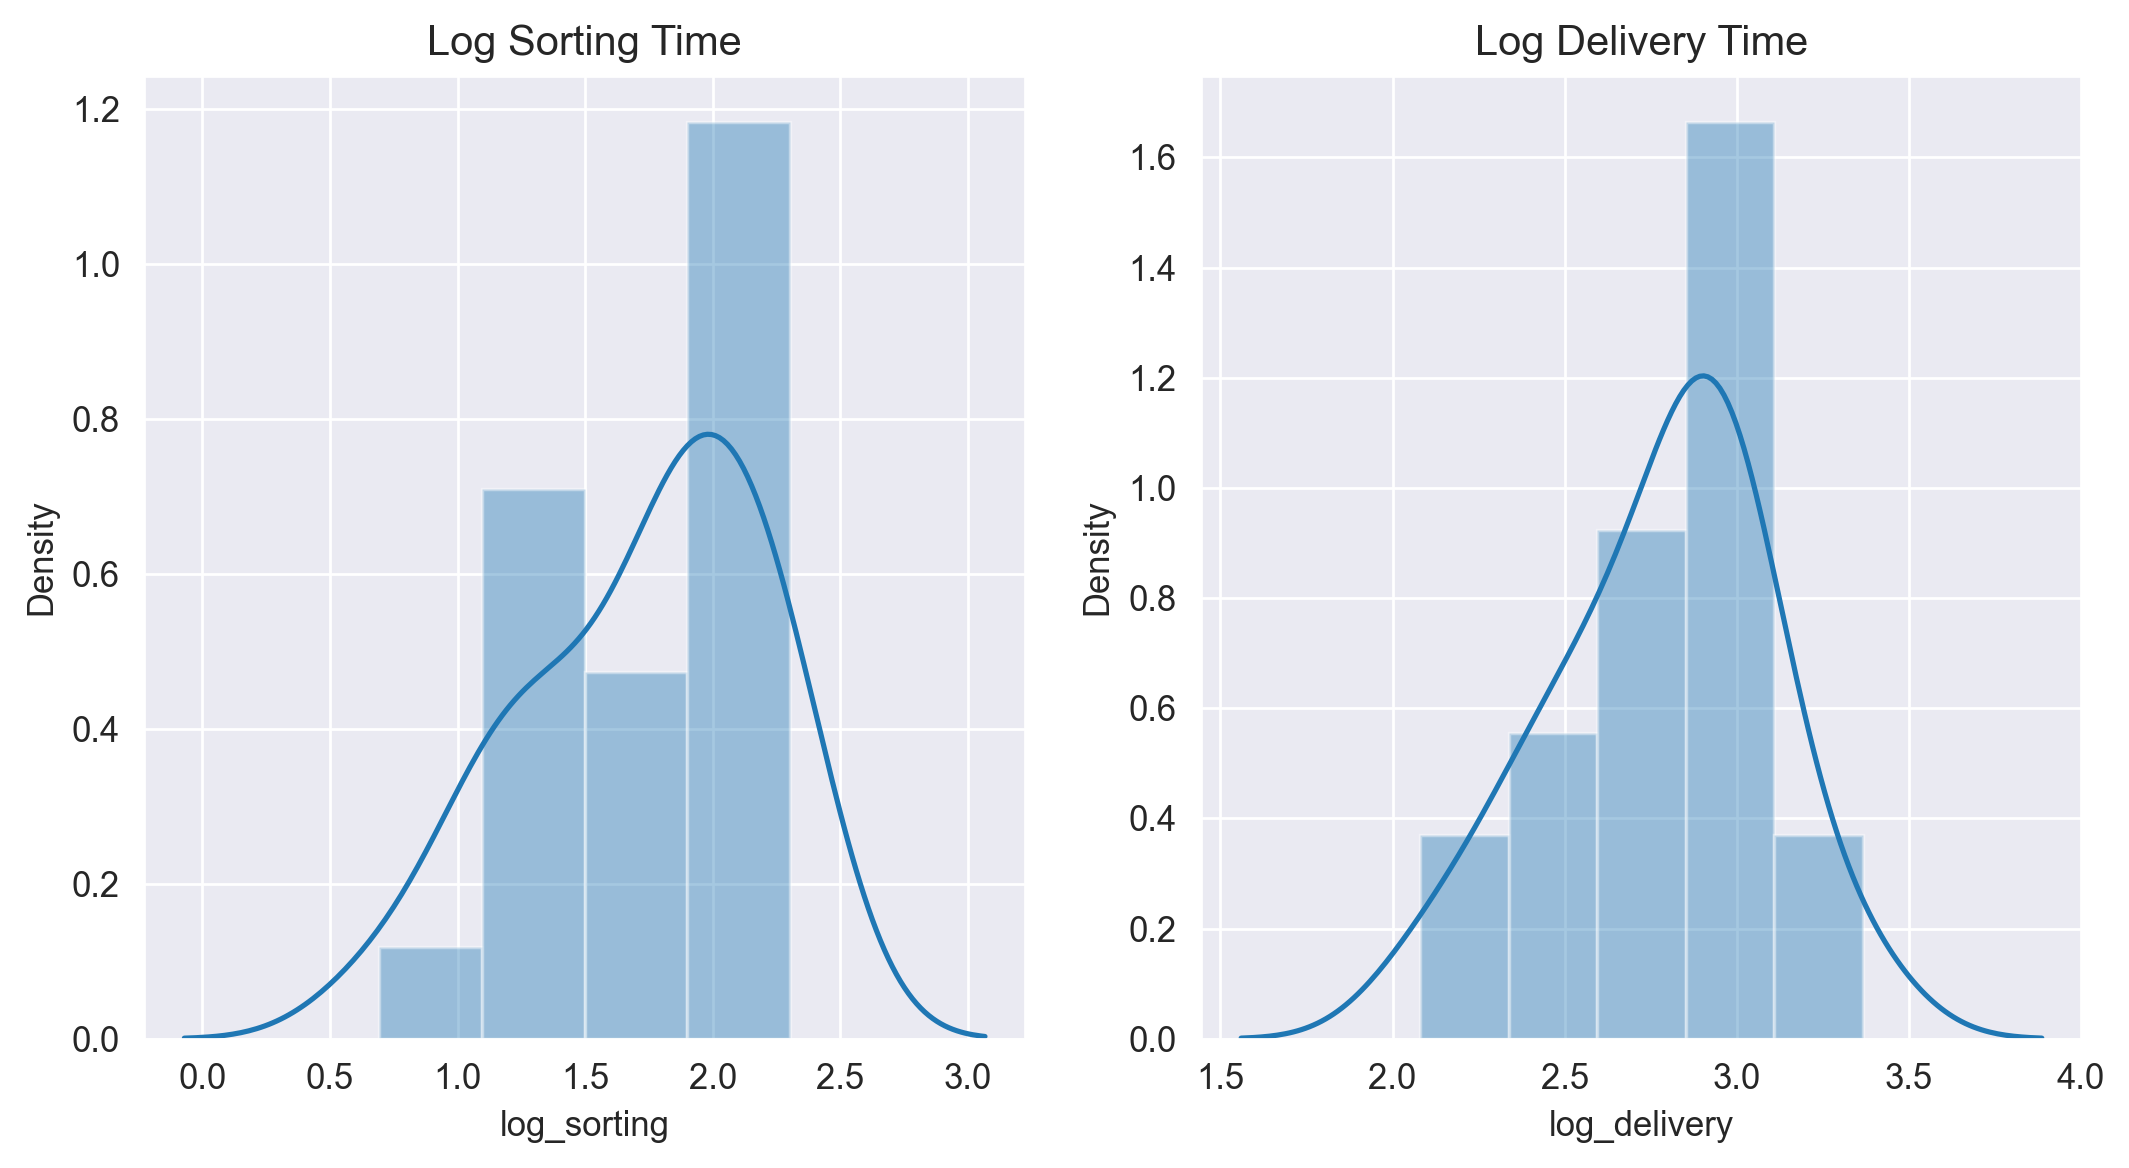

In [21]:
plt.subplot(1,2,1)
sns.distplot(df['log_sorting'])
plt.title('Log Sorting Time')

plt.subplot(1,2,2)
sns.distplot(df['log_delivery'])
plt.title('Log Delivery Time')

plt.rcParams['figure.figsize'] = (10,10)

In [22]:
df['log_delivery'].skew()

-0.4512901148522999

In [23]:

df['log_sorting'].skew()

-0.6052357185134765

In [ ]:
#Salary Dataset

In [26]:
df1=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\salary_data.csv',encoding='latin1')
df1


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [27]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

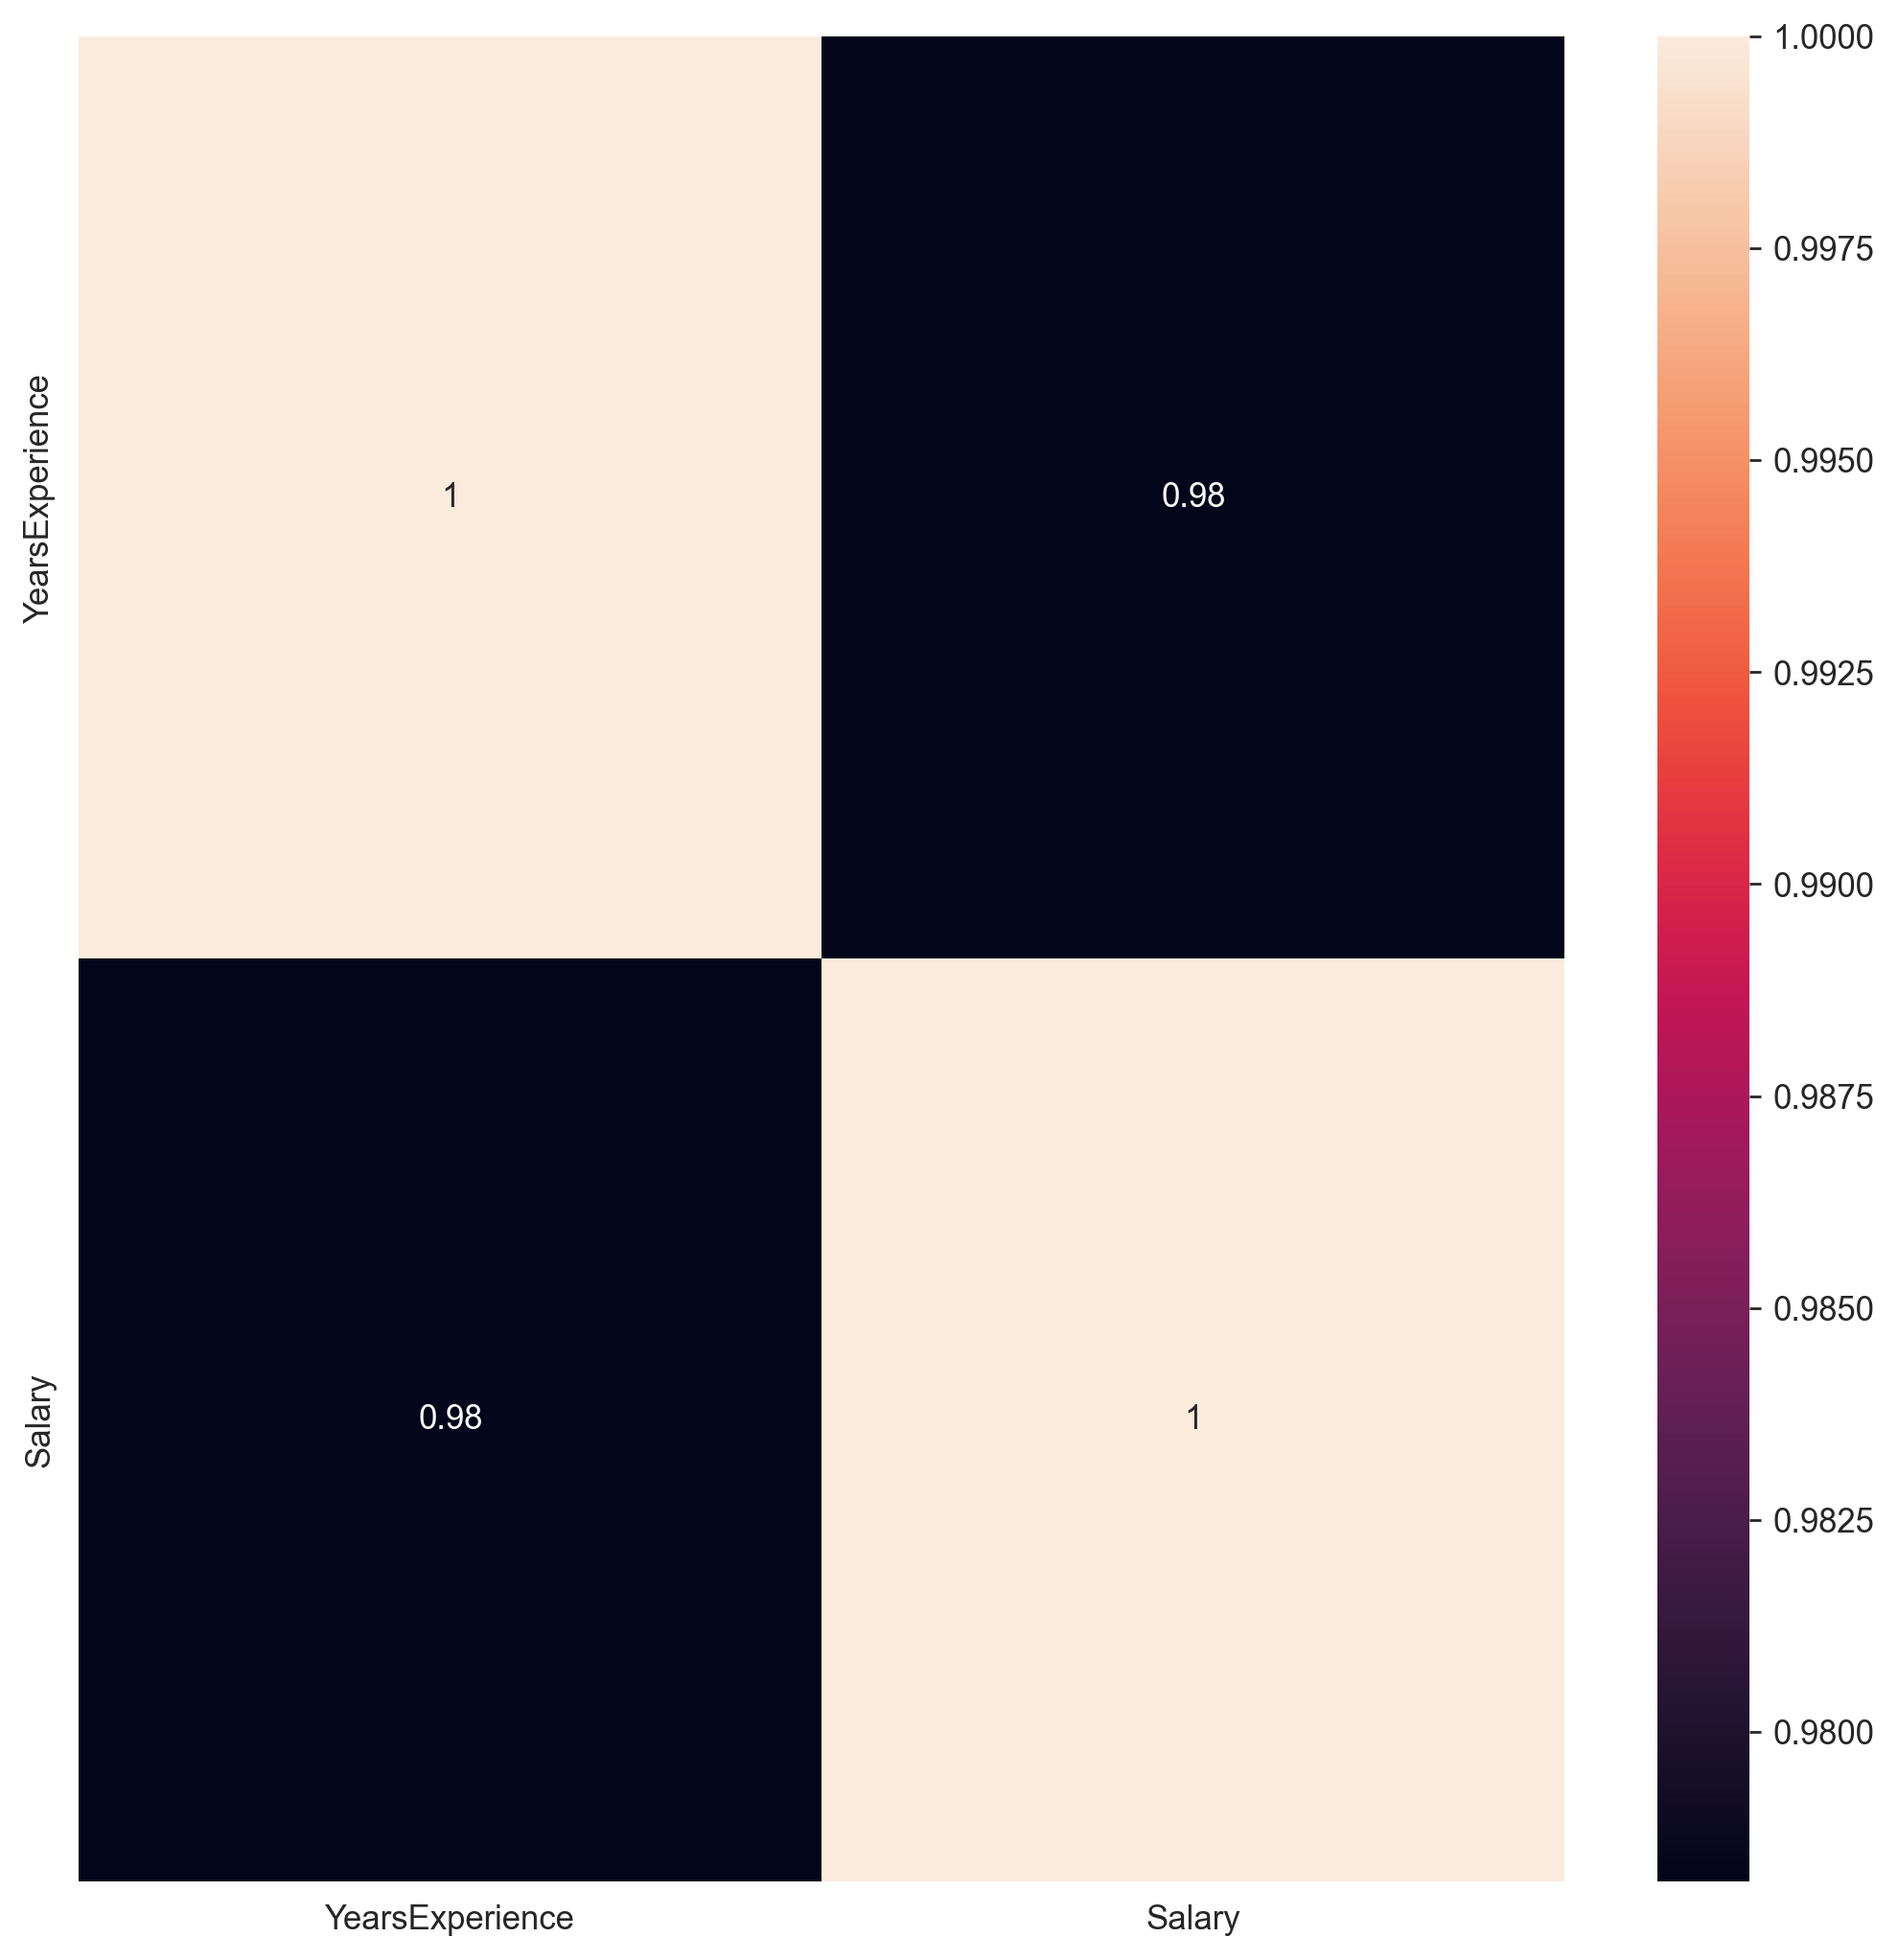

In [29]:
sns.heatmap(df1.corr(),annot=True)

In [30]:
model=smf.ols('Salary~YearsExperience',data=df1).fit()
model

In [31]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [32]:
YearsExperience=3

y=9449.962321*YearsExperience+ 25792.200199
y

54142.087162

In [33]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [34]:
model.rsquared

0.9569566641435086

In [35]:
newdf=pd.DataFrame({'YearsExperience' :[2,3,4,5,6]})
newdf

,YearsExperience
0,2
1,3
2,4
3,5
4,6


In [36]:
model.predict(newdf)

0    44692.124842
1    54142.087163
2    63592.049484
3    73042.011806
4    82491.974127
dtype: float64

In [43]:
# Data Transformation

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\1177402169.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['YearsExperience'])
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\1177402169.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Salary'])


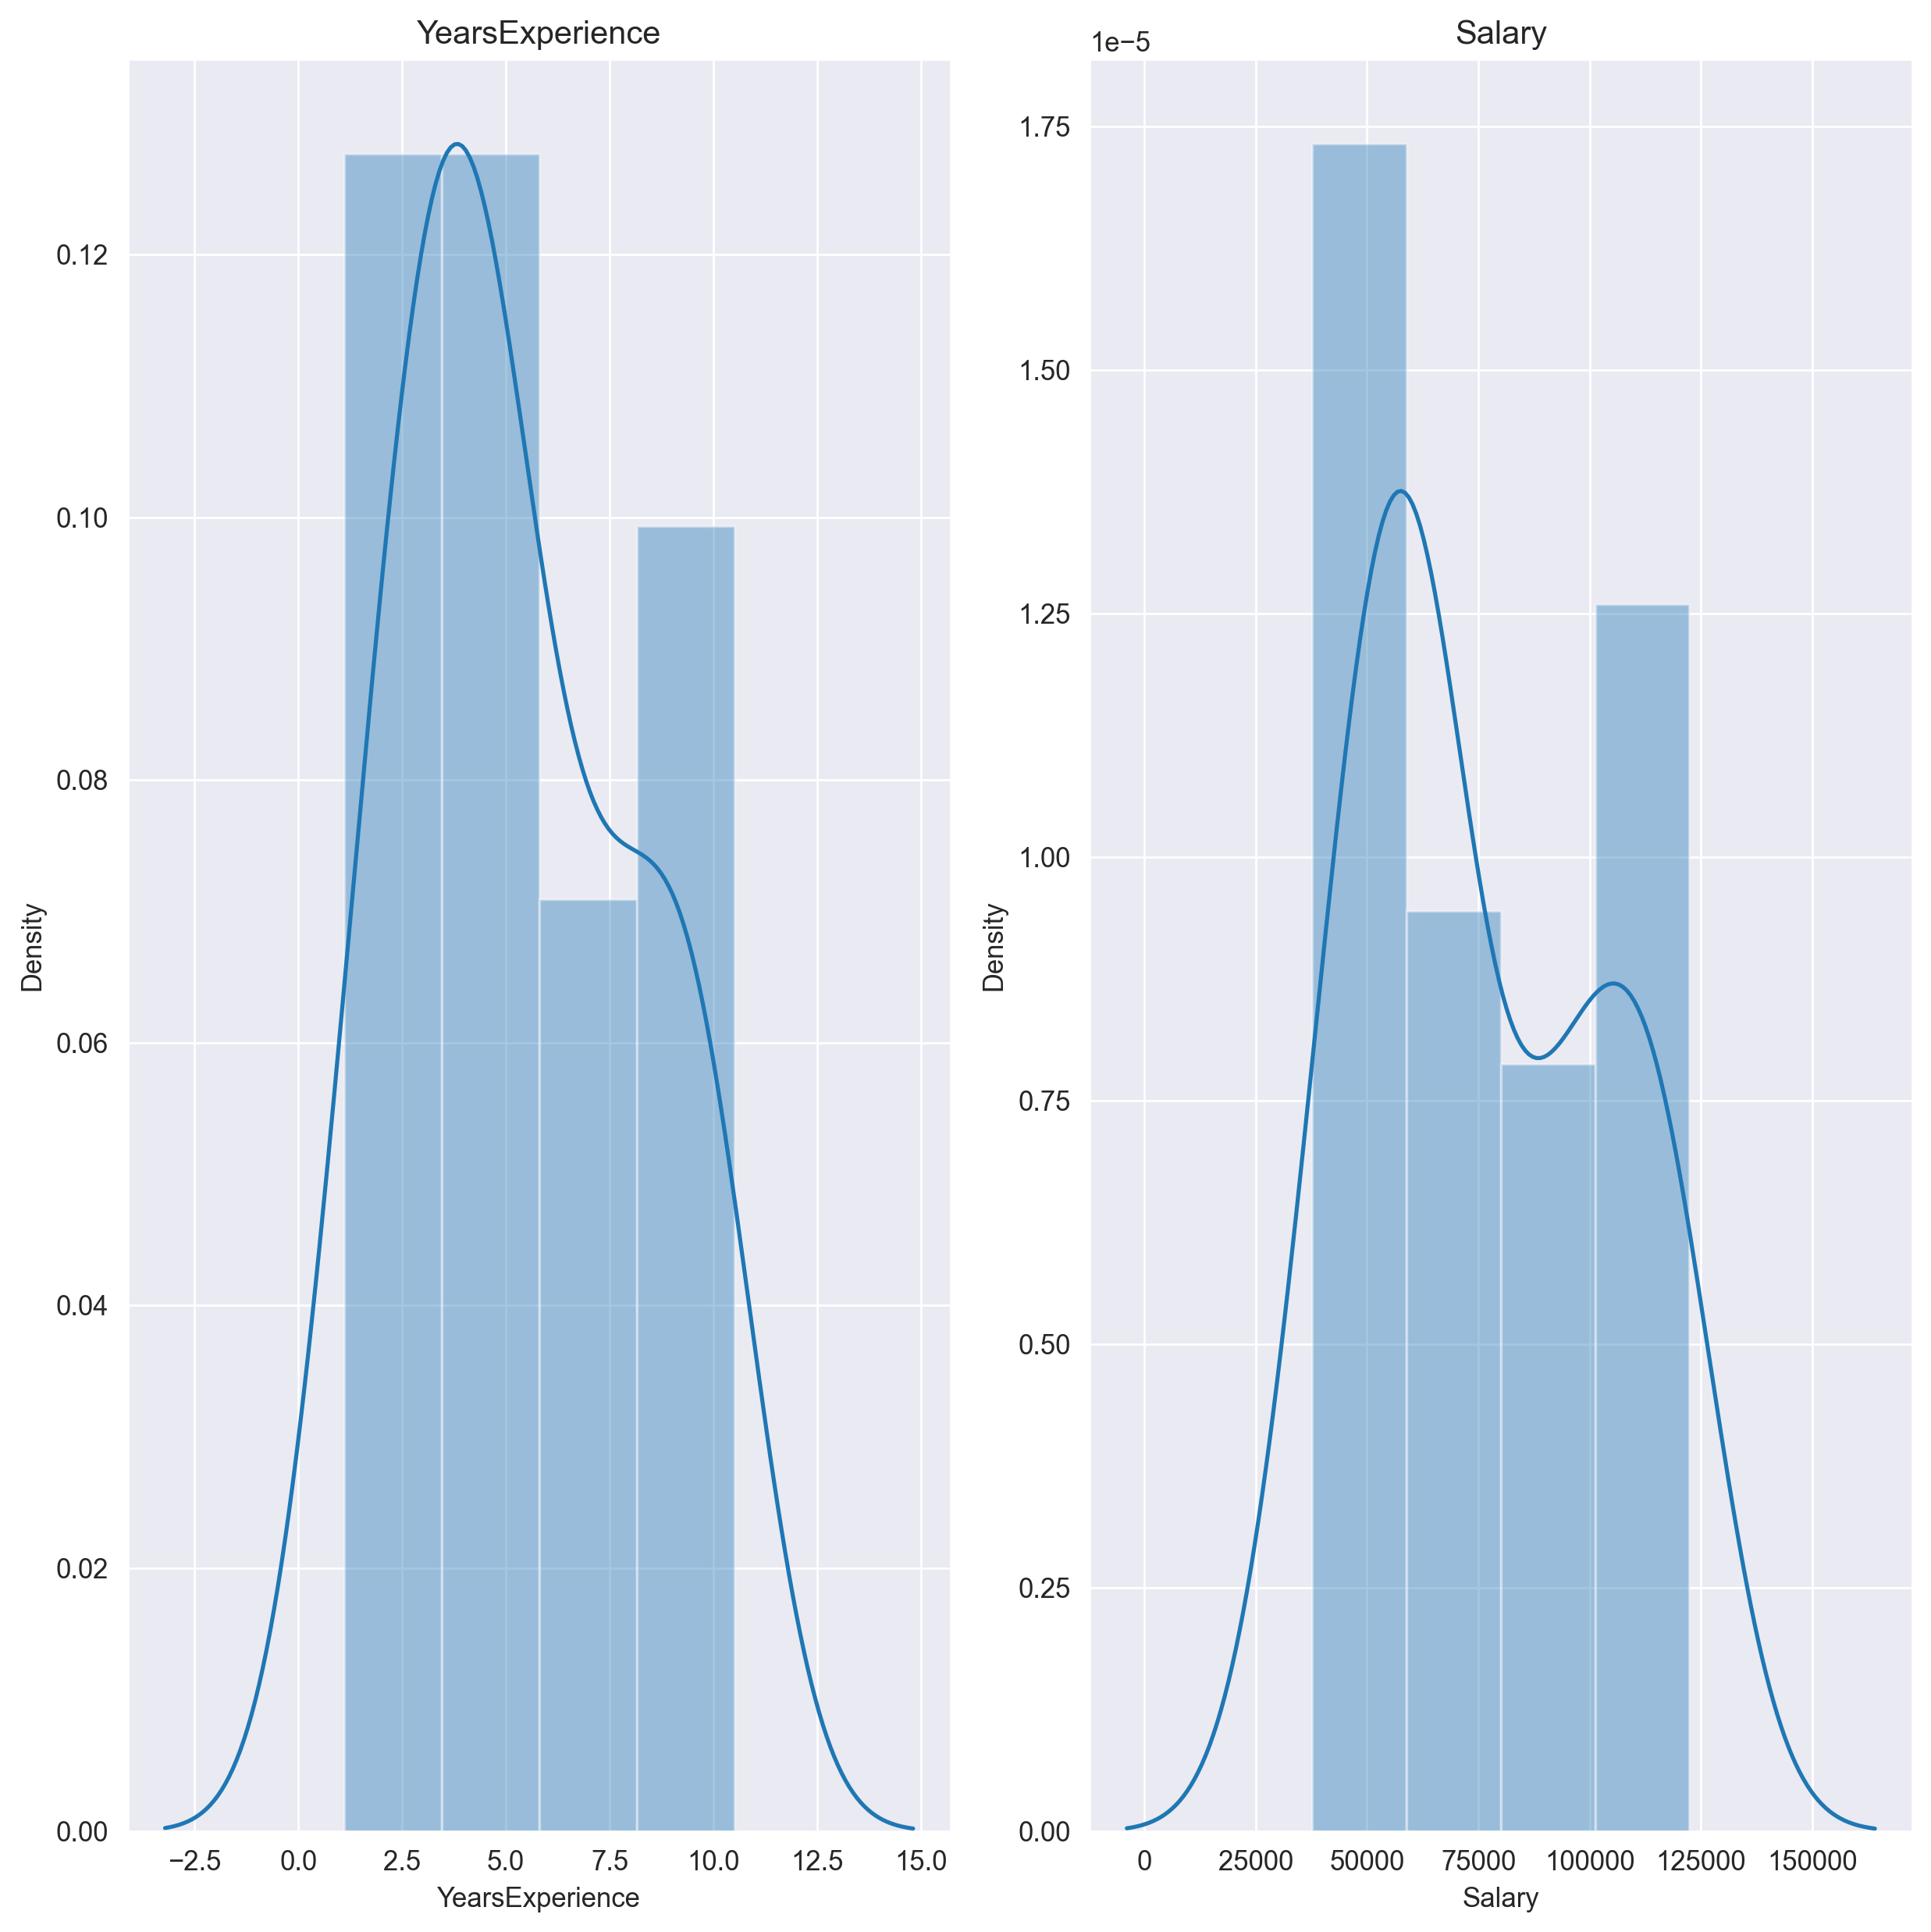

In [44]:
plt.subplot(1,2,1)
sns.distplot(df1['YearsExperience'])
plt.title('YearsExperience')

plt.subplot(1,2,2)
sns.distplot(df1['Salary'])
plt.title('Salary')
plt.tight_layout()

In [45]:
df1['YearsExperience'].skew()

0.37956024064804106

In [46]:
df1['Salary'].skew()

0.35411967922959153

In [47]:
#Log Transformation

In [48]:
df1['log_ex'] = np.log(df1['YearsExperience'])
df1['log_salary'] = np.log(df1['Salary'])
df1.head()

,YearsExperience,Salary,log_ex,log_salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\787565880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['log_salary'])
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_15144\787565880.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['log_ex'])


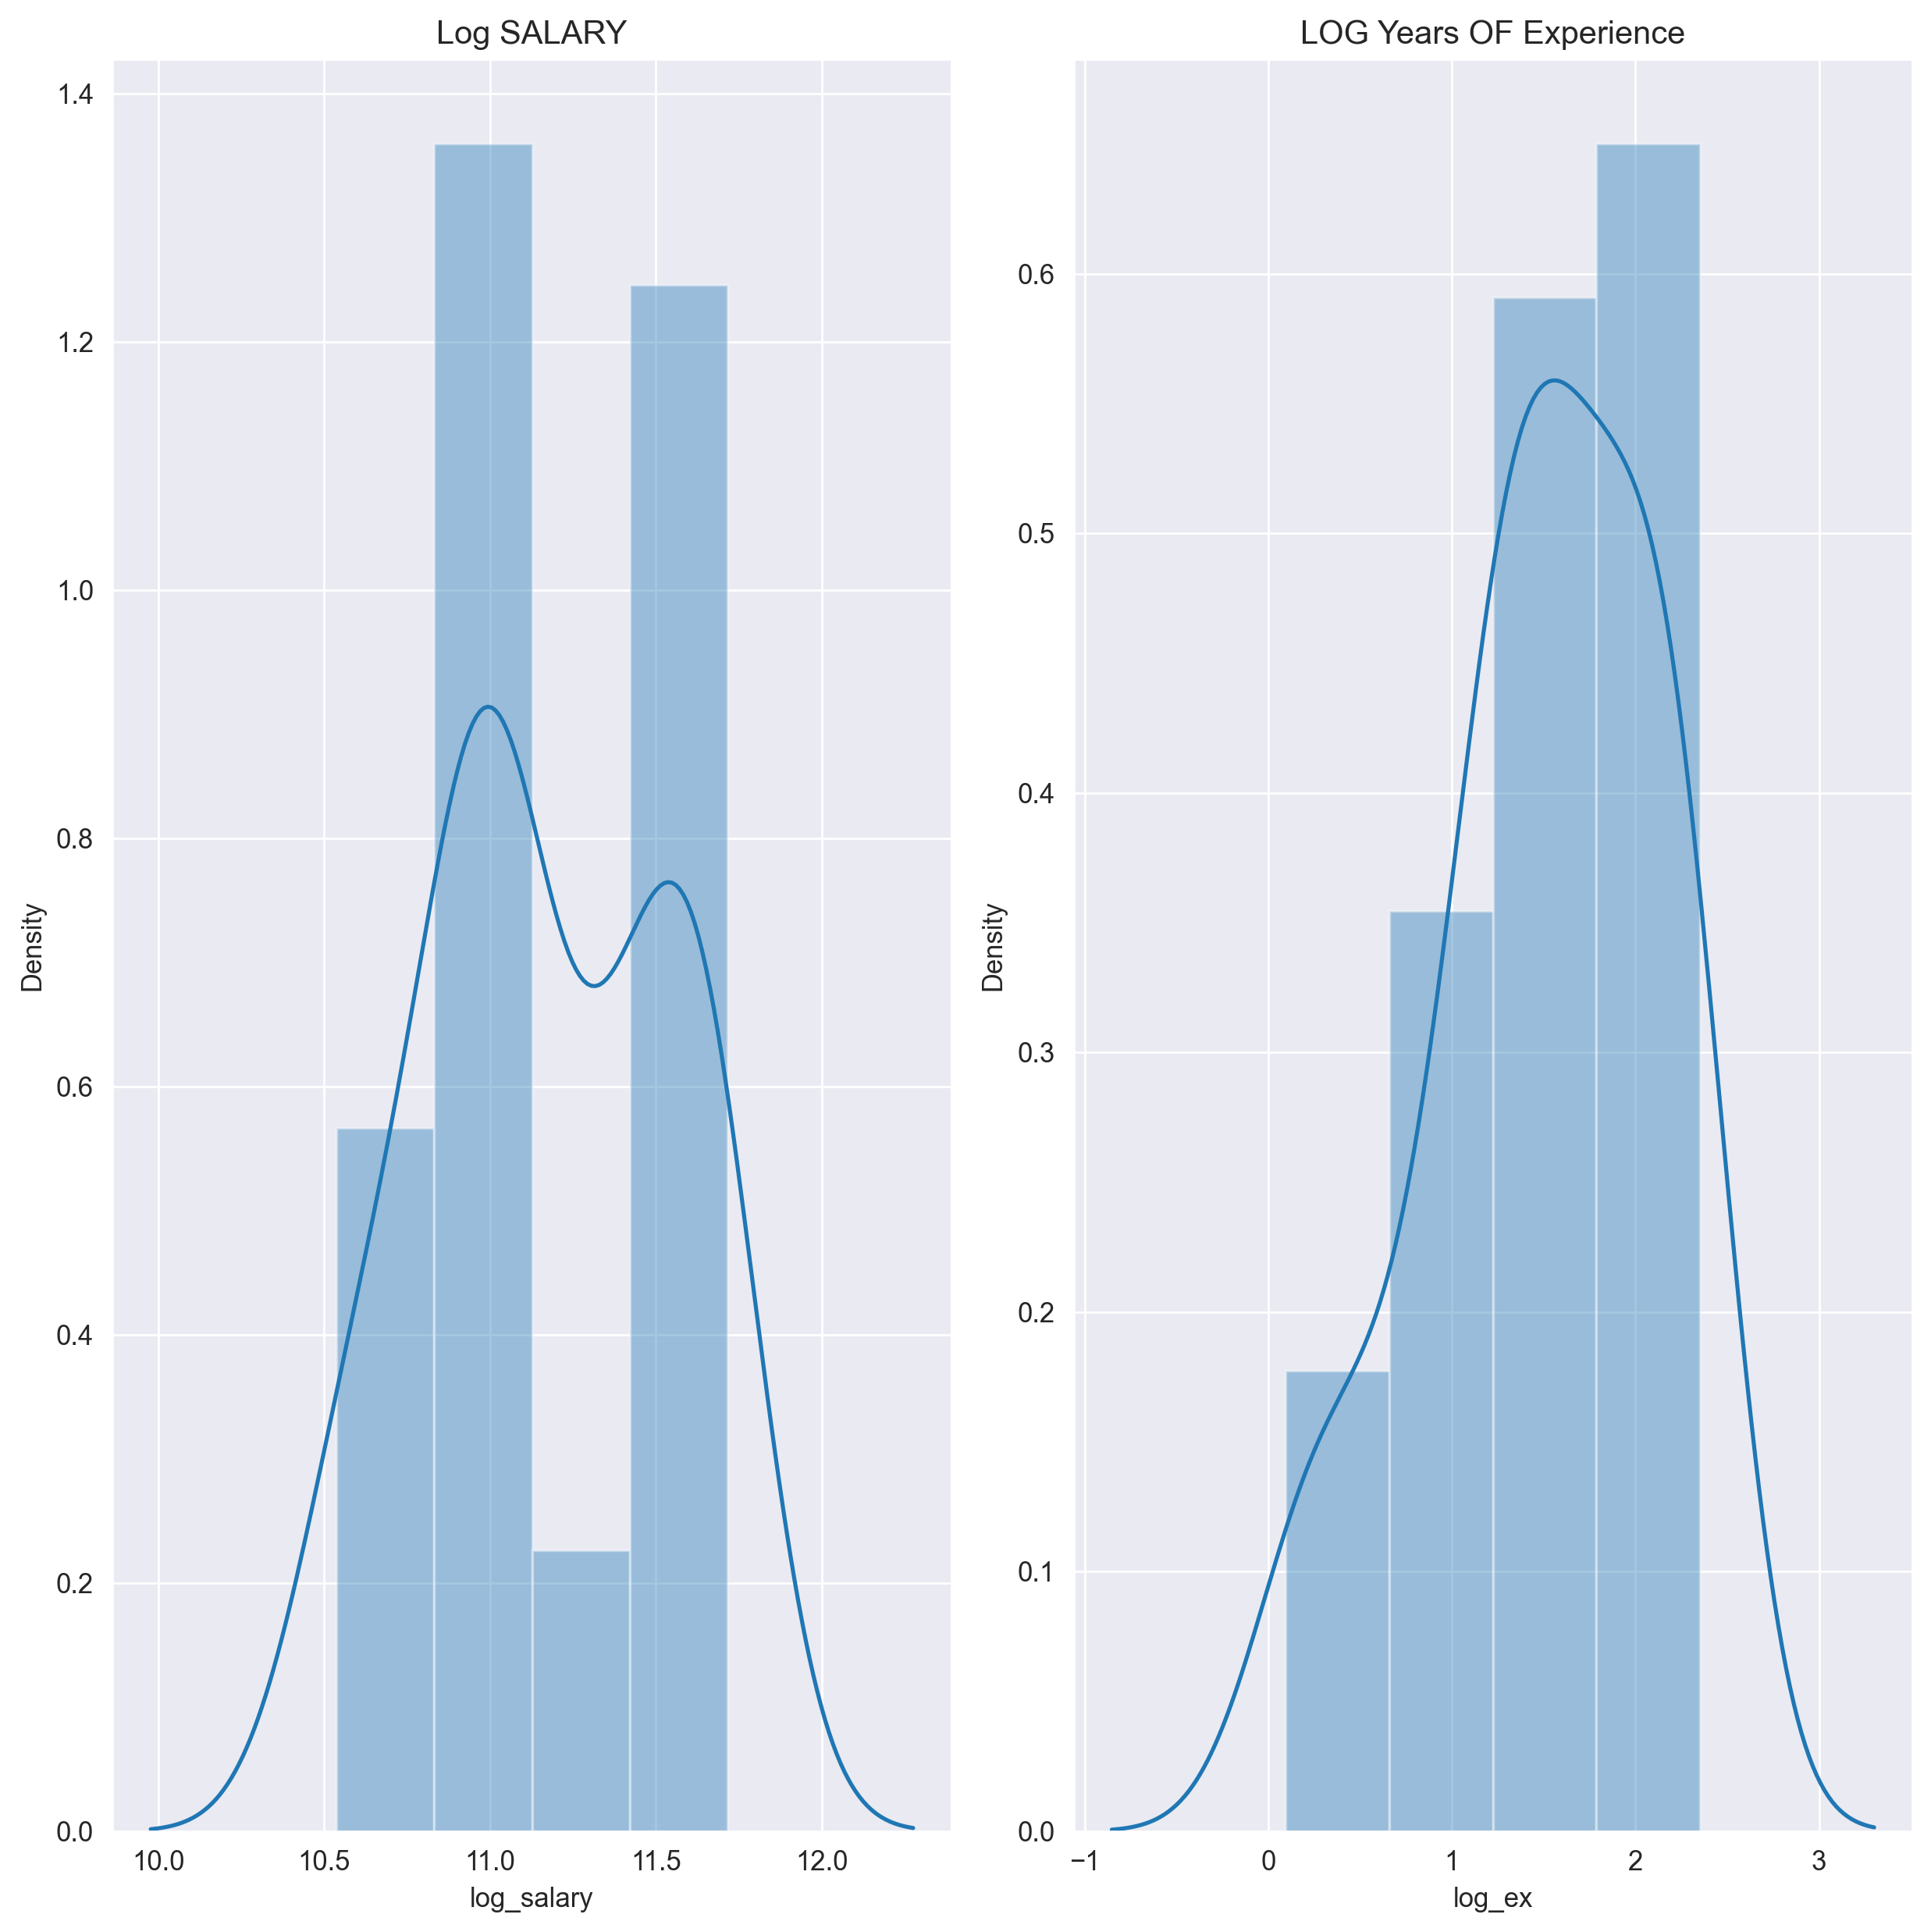

In [49]:
plt.subplot(1,2,1)
sns.distplot(df1['log_salary'])
plt.title('Log SALARY')

plt.subplot(1,2,2)
sns.distplot(df1['log_ex'])
plt.title('LOG Years OF Experience')

plt.tight_layout()

In [50]:
df1['log_ex'].skew()

-0.6005648582626513

In [51]:
df1['log_salary'].skew()

-0.044126086756988495